In [ ]:
##  "all_data.csv" file is required for the operation of the program.
##  "all_data.csv" file must be located in the same directory as the program.


##  the purpose of this code is to determine which features to use in the machine learning phase.
##  for this purpose, the importance weights of the attacks are calculated.
##  this calculation was made using sklearn-RandomForestRegressor.


import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

def folder(f_name): #this function creates a folder named "feature_pics" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        

# CSV files names:
csv_file = "CICIDS2018/all_data.csv"

# Headers of column
main_labels=['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std',
 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size',
 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']

ths = open("importance_list_all_data.csv", "w")
folder("feature_pics/")

df=pd.read_csv(csv_file,usecols=main_labels)
df=df.fillna(0)
attack_or_not=[]
for i in df["Label"]:#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
    if i =="BENIGN":
        attack_or_not.append(1)
    else:
        attack_or_not.append(0)           
df["Label"]=attack_or_not

y = df["Label"].values
del df["Label"]
X = df.values


X = np.float32(X)
X[np.isnan(X)] = 0
X[np.isinf(X)] = 0





In [ ]:
N = X.shape[0]

Batch 1.0
Batch 2.0
Batch 3.0
Batch 4.0
Batch 5.0
Batch 6.0
Batch 7.0
Batch 8.0
Batch 9.0
Batch 10.0


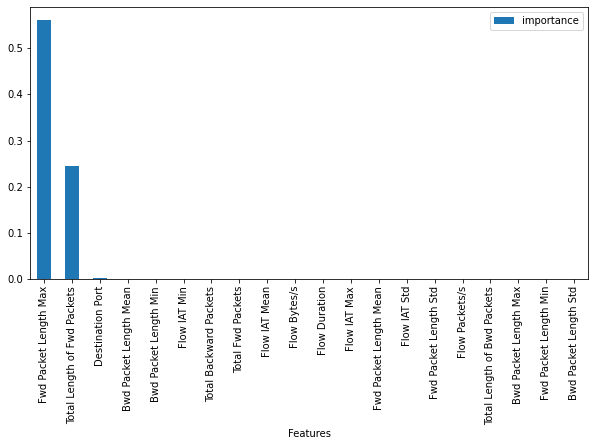

In [ ]:
#computing the feature importances
# forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
# forest.fit(X, y)
for i in range(0, N, 300000):
    print("Batch",i/300000 +1)
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0,warm_start = True)
    forest.fit(X[i:min(i+300000,N),:], y[i:min(i+300000,N)])

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
              axis=0)
indices = np.argsort(importances)[::-1]
refclasscol=list(df.columns.values)
impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
plt.rcParams['figure.figsize'] = (10, 5)
impor_bars.plot.bar();
#printing the feature importances  
count=0
fea_ture=csv_file[0:-4]+"=["
for i in impor_bars.index:
    fea_ture=fea_ture+"\""+str(i)+"\","
    count+=1
    if count==5:
        fea_ture=fea_ture[0:-1]+"]"
        break     


all_data importance list:
all_data 
                                importance
Features                                 
Fwd Packet Length Max        5.612045e-01
Total Length of Fwd Packets  2.454680e-01
Destination Port             1.482051e-03
Bwd Packet Length Mean       2.632343e-04
Bwd Packet Length Min        2.620990e-04
Flow IAT Min                 1.234671e-04
Total Backward Packets       3.383713e-05
Total Fwd Packets            3.174562e-05
Flow IAT Mean                2.447592e-05
Flow Bytes/s                 2.293810e-05
Flow Duration                2.135135e-05
Flow IAT Max                 2.063519e-05
Fwd Packet Length Mean       1.860631e-05
Flow IAT Std                 1.610732e-05
Fwd Packet Length Std        1.542416e-05
Flow Packets/s               7.387741e-06
Total Length of Bwd Packets  6.459230e-06
Bwd Packet Length Max        4.776723e-06
Fwd Packet Length Min        3.606147e-06
Bwd Packet Length Std        2.249068e-07 



all_data=["Fwd Packet Length Max","

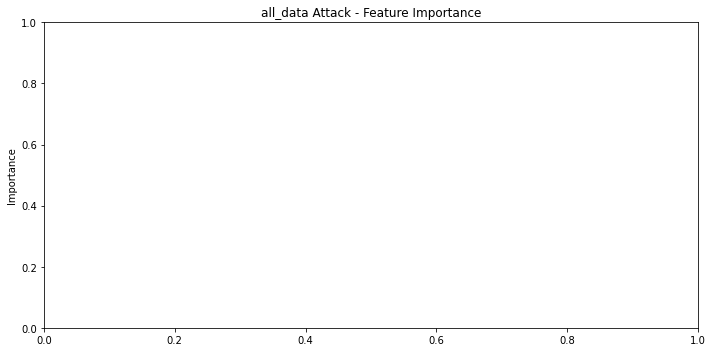

In [ ]:
print(csv_file[0:-4],"importance list:")
print(csv_file[0:-4],"\n",impor_bars.head(20),"\n\n\n")
print(fea_ture)
plt.title(csv_file[0:-4]+" Attack - Feature Importance ")
plt.ylabel('Importance')
plt.savefig("feature_pics/"+csv_file[0:-4]+".pdf",bbox_inches='tight', papertype = 'a4', orientation = 'portrait', format = 'pdf')
ths.write((  fea_ture ) )
plt.tight_layout()
#plt.show()
print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"secomds")
ths.close()